# Regularized_linear_regression
- 다이아몬드의 특성을 회귀분석하여, 예상가격을 에측한다.

In [1]:
import pandas as pd

d_df = pd.read_csv('../datasets/diamond.csv')
d_df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,53941,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,53942,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [2]:
# 불필요 컬럼 삭제
pre_d_df = d_df.drop(labels = ['Unnamed: 0'], axis = 1)
pre_d_df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [3]:
# pre_d_df.isna().sum()
# pre_d_df.duplicated().sum()

# pre_d_df = pre_d_df.drop_duplicates()

In [4]:
# pre_d_df = pre_d_df.reset_index(drop=True)

In [5]:
# target 데이터 이동
target_column = pre_d_df.pop('price')
pre_d_df['target'] = target_column
pre_d_df

,carat,cut,color,clarity,depth,table,x,y,z,target
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,2757
53939,0.75,Ideal,D,SI2,62.2,55.0,5.83,5.87,3.64,2757
53940,0.71,Premium,E,SI1,60.5,55.0,5.79,5.74,3.49,2756
53941,0.71,Premium,F,SI1,59.8,62.0,5.74,5.73,3.43,2756


In [6]:
# label encoding
from sklearn.preprocessing import LabelEncoder

columns = ['cut','color','clarity']
label_encoders = {}

for column in columns:
    encoder = LabelEncoder()
    result = encoder.fit_transform(pre_d_df[column])
    label_encoders[column] = encoder.classes_
    pre_d_df[column] = result

label_encoders


{'cut': array(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype=object),
 'color': array(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object),
 'clarity': array(['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'],
       dtype=object)}

array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'cut'}>,
        <Axes: title={'center': 'color'}>],
       [<Axes: title={'center': 'clarity'}>,
        <Axes: title={'center': 'depth'}>,
        <Axes: title={'center': 'table'}>],
       [<Axes: title={'center': 'x'}>, <Axes: title={'center': 'y'}>,
        <Axes: title={'center': 'z'}>],
       [<Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

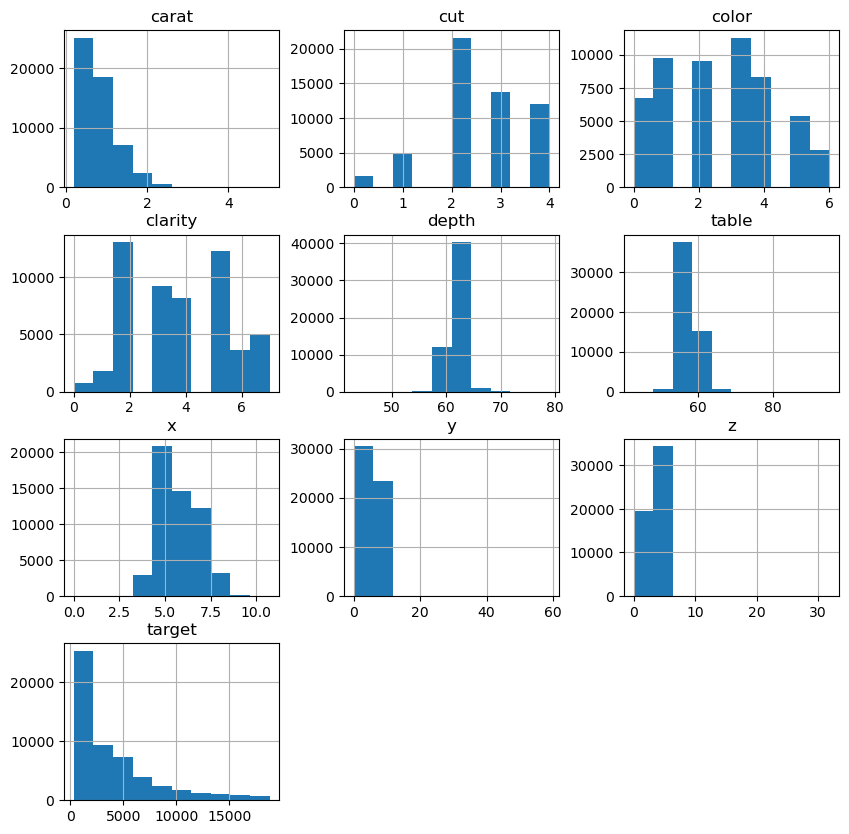

In [7]:
pre_d_df.hist(figsize=(10,10))

In [8]:
# 상관관계 확인
pre_d_df.corr()['target'].sort_values(ascending=False)[1:]

carat      0.921591
x          0.884433
y          0.865419
z          0.861249
color      0.172520
table      0.127118
cut        0.039847
depth     -0.010630
clarity   -0.071525
Name: target, dtype: float64

<Axes: >

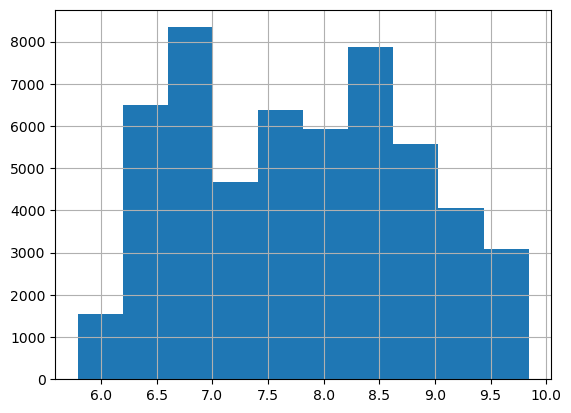

In [9]:
# target log 데이터 변경
import numpy as np 
np.log1p(pre_d_df.target).hist()

In [10]:
pre_d_df.loc[:, 'target'] = np.log1p(pre_d_df.target)
pre_d_df

,carat,cut,color,clarity,depth,table,x,y,z,target
0,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43,5.789960
1,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31,5.789960
2,0.23,1,1,4,56.9,65.0,4.05,4.07,2.31,5.793014
3,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63,5.814131
4,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75,5.817111
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,3,4,3,61.0,58.0,6.15,6.12,3.74,7.922261
53939,0.75,2,0,3,62.2,55.0,5.83,5.87,3.64,7.922261
53940,0.71,3,1,2,60.5,55.0,5.79,5.74,3.49,7.921898
53941,0.71,3,2,2,59.8,62.0,5.74,5.73,3.43,7.921898


In [11]:
# OLS 지표 확인
from statsmodels.api import OLS

features, targets = pre_d_df.iloc[:, :-1], pre_d_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          6.620e+06
Date:                Wed, 08 May 2024   Prob (F-statistic):                        0.00
Time:                        13:45:26   Log-Likelihood:                          1308.0
No. Observations:               53943   AIC:                                     -2598.
Df Residuals:                   53934   BIC:                                     -2518.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

features, targets = pre_d_df.iloc[:, :-1], pre_d_df.iloc[:, -1]

X_train, X_test, y_train, y_test =\
train_test_split(features, targets, test_size=0.2, random_state=321)

l_r = LinearRegression()
l_r.fit(X_train, y_train)


LinearRegression()

In [13]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))

In [14]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.0585, RMSE: 0.2418, MSLE: 0.0008, RMSLE: 0.0289, R2: 0.9426


In [15]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

features, targets = pre_d_df.iloc[:, :-1], pre_d_df.iloc[:, -1]

X_train, X_test, y_train, y_test =\
train_test_split(features, targets, test_size=0.2, random_state=321)

lasso = Lasso(alpha=0.1, max_iter=10000)
lasso.fit(X_train, y_train)


Lasso(alpha=0.1, max_iter=10000)

In [16]:
prediction = lasso.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.0850, RMSE: 0.2915, MSLE: 0.0011, RMSLE: 0.0335, R2: 0.9166


In [17]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

features, targets = pre_d_df.iloc[:, :-1], pre_d_df.iloc[:, -1]

X_train, X_test, y_train, y_test =\
train_test_split(features, targets, test_size=0.2, random_state=321)

ridge = Ridge(alpha=10000, max_iter=10000)
ridge.fit(X_train, y_train)


Ridge(alpha=10000, max_iter=10000)

In [18]:
prediction = ridge.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.0960, RMSE: 0.3098, MSLE: 0.0010, RMSLE: 0.0316, R2: 0.9058
